In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [4]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

In [5]:
## Adding the bias term which is 1 always.
X_with_bias = np.c_[np.ones([len(X), 1]), X]

In [6]:
np.random.seed(2042)

In [7]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X_with_bias, y, test_size=0.1)
print(X_train_val.shape, X_test.shape, y_train_val.shape, y_test.shape)

(135, 3) (15, 3) (135,) (15,)


In [8]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.2)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(108, 3) (27, 3) (108,) (27,)


In [9]:
import pandas as pd

y_train_ohe = pd.get_dummies(y_train, dtype='int')

In [10]:
y_train_ohe.head()

,0,1,2
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


In [11]:
y_train_ohe = pd.get_dummies(y_train, dtype='int')
y_val_ohe = pd.get_dummies(y_val, dtype='int')
y_test_ohe = pd.get_dummies(y_test, dtype='int')

Softmax function is defined by the following equation:

$\sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \dfrac{\exp\left(s_k(\mathbf{x})\right)}{\sum\limits_{j=1}^{K}{\exp\left(s_j(\mathbf{x})\right)}}$

In [12]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums

In [13]:
n_inputs = X_train.shape[1] # == 3 (2 features plus the bias term)
n_outputs = len(np.unique(y_train))   # == 3 (3 iris classes)

The cost function equation is:

$J(\mathbf{\Theta}) =
- \dfrac{1}{m}\sum\limits_{i=1}^{m}\sum\limits_{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}$

And the equation for the gradients:

$\nabla_{\mathbf{\theta}^{(k)}} \, J(\mathbf{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}}$

Note that $\log\left(\hat{p}_k^{(i)}\right)$ may not be computable if $\hat{p}_k^{(i)} = 0$. So we will add a tiny value $\epsilon$ to $\log\left(\hat{p}_k^{(i)}\right)$ to avoid getting `nan` values.

In [14]:
eta = 0.01
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7

In [15]:
theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(theta)
    y_proba = softmax(logits)
    if iteration % 500 == 0:
        loss = -np.mean(np.sum(y_train_ohe * np.log(y_proba + epsilon), axis=1))
        print(iteration, loss)
    error = y_proba - y_train_ohe
    gradients = 1/m * X_train.T.dot(error)
    theta = theta - eta * gradients

0 4.200327844821948
500 0.6089422520840796
1000 0.535822891926278
1500 0.48843146490353384
2000 0.45498762208368654
2500 0.42971152881914493
3000 0.40959216640035073
3500 0.39294608685770943
4000 0.37876833716000646
4500 0.3664237636451167
5000 0.355490842274624


In [16]:
theta

array([[ 3.93921873,  0.03779238, -2.35273205],
       [-0.54313119,  0.77856937,  0.20456871],
       [-2.82924295, -2.16340188,  1.23525135]])

In [17]:
logits = X_val.dot(theta)
y_proba = softmax(logits)
y_predict = np.argmax(y_proba, axis=1)

accuracy = np.mean(y_predict == y_val)
accuracy

np.float64(0.8888888888888888)

The model looks pretty good. We can also add a bit of $\ell_2$ regularization. Lets add some penalty, we make the following changes to the above code, the loss now has an additional $\ell_2$ penalty, and the gradients have the proper additional term (note that we don't regularize the first element of `Theta` since this corresponds to the bias term). Also, let's try increasing the learning rate `eta`.

In [18]:
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter

theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(theta)
    y_proba = softmax(logits)
    if iteration % 500 == 0:
        cross_entropy_loss = -np.mean(np.sum(y_train_ohe * np.log(y_proba + epsilon), axis=1))
        l2_loss = 1/2 * np.sum(np.square(theta[1:]))
        loss = cross_entropy_loss + alpha * l2_loss
        print(iteration, loss)
    error = y_proba - y_train_ohe
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * theta[1:]]
    theta = theta - eta * gradients

0 3.2234835898945335
500 0.5292891679200885
1000 0.5034204456879456
1500 0.49611342002782394
2000 0.49347575237215646
2500 0.4924433726232536
3000 0.49202273640691946
3500 0.4918473792409558
4000 0.49177325532082117
4500 0.491741650681982
5000 0.4917281008316425


In [19]:
logits = X_val.dot(theta)
y_proba = softmax(logits)
y_predict = np.argmax(y_proba, axis=1)

accuracy = np.mean(y_predict == y_val)
accuracy

np.float64(0.8518518518518519)

This seems even better.

Now let's add early stopping. For this we just need to measure the loss on the validation set at every iteration and stop when the error starts growing.

In [20]:
eta = 0.1 
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter
best_loss = np.inf

theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(theta)
    y_proba = softmax(logits)
    error = y_proba - y_train_ohe
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * theta[1:]]
    theta = theta - eta * gradients

    logits = X_val.dot(theta)
    y_proba = softmax(logits)
    cross_entropy_loss = -np.mean(np.sum(y_val_ohe * np.log(y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(theta[1:]))
    loss = cross_entropy_loss + alpha * l2_loss
    if iteration % 500 == 0:
        print(iteration, loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss, "early stopping!")
        break 

0 1.4337092921250296
500 0.5249715271743064
1000 0.49872179660293386
1500 0.49427695337033134
2000 0.49351663497470727
2112 0.4935019144234046
2113 0.4935019150440688 early stopping!


In [21]:
logits = X_val.dot(theta)
y_proba = softmax(logits)
y_predict = np.argmax(y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_val)
accuracy_score

np.float64(0.8518518518518519)

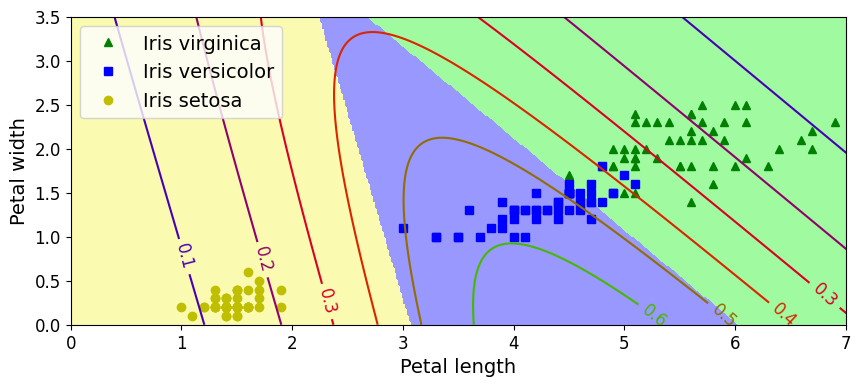

In [22]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

logits = X_new_with_bias.dot(theta)
y_proba = softmax(logits)
y_predict = np.argmax(y_proba, axis=1)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [23]:
logits = X_test.dot(theta)
y_proba = softmax(logits)
y_predict = np.argmax(y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score

np.float64(0.9333333333333333)